# **Integração ChatBot Gemini com Python**

---

Os chatbots de IA são excelentes ferramentas para auxiliar nas mais variadas tarefas do dia a dia. Neste código, procurei explorar algumas das funcionalidades da documentação da API Gemini (Google) com Python. Uma das grandes vantagens está no custo zero para uso em pequena escala (15 requests por minuto, 1500 por dia).

Neste guia você verá como explorar diferentes entradas (texto, imagem e vídeo) para obter saídas bem criativas e que atendam às suas demandas. Também a criar chats com a IA, códigos de programação. Por fim, você verá como personalizar as respostase e criar personas que podem ajudar em suas demandas.

---

## 1. ChatBot Gemini: configurações iniciais

Links úteis da documentação Gemini API

https://ai.google.dev/api/python/google/generativeai

https://ai.google.dev/gemini-api/docs/get-started/tutorial?hl=pt-br&lang=python

### 1.1. Bibliotecas

In [55]:
#pip install google-generativeai

import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

### 1.2. Chave API Gemini

Primeiro, será necessário configurar sua chave de API Gemini. Se ainda não tiver, basta usar o link (você precisará estar logado na sua conta Google):

https://aistudio.google.com/app/apikey?hl=pt-br

Quando obtiver, basta inserir no comando abaixo (lembre-se que ela é pessoal e intrasferível)

In [56]:
genai.configure(api_key="SUA_CHAVE_API")

### 1.3. Definir o modelo API Gemini

A API Gemini oferece modelos diferentes para usos específicos (ex., texto, imagens, raciocínio complexo...). Cada modelo difere em suas entradas e saídas, assim como limites de taxas e especificações.

Você pode checar os modelos disponíveis nesse link:

https://ai.google.dev/gemini-api/docs/models/gemini?hl=pt-br

Como estamos procurando algo gratuito, podemos usar o "gemini-1.5-flash". Ele é sem custo financeiro até 15 RPM (solicitações por minuto) e 1500 RPD (solicitações por dia)

In [57]:
model = genai.GenerativeModel('gemini-1.5-flash')

### 1.4. Gerar texto a partir de entradas de texto

In [152]:
response = model.generate_content("Qual a linguagem de programação mais popular do mundo?")

Veja que o output é uma string, que dificulta um pouco para leitura

In [154]:
response.text

'A linguagem de programação mais popular do mundo **varia dependendo de como você mede a popularidade**. \n\n* **Segundo o índice TIOBE, que se baseia em pesquisas de motores de busca e engenheiros, a linguagem mais popular em Janeiro de 2023 é **Python**. ** \n* **O Stack Overflow, que se baseia em dados de sua comunidade de desenvolvedores, aponta **JavaScript** como a linguagem mais usada em 2022. **\n* **O GitHub, que se baseia no número de repositórios e contribuições, coloca **JavaScript** em primeiro lugar, seguido por **Python**. **\n\nEm resumo, **Python e JavaScript** são as linguagens mais populares do mundo, dependendo do critério usado para medir a popularidade.\n'

Com essa função, os outputs em texto serão convertidos de string para markdown. Ela será usada em todos os novos outputs.

In [155]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [61]:
to_markdown(response.text)

> A linguagem de programação mais popular do mundo muda constantemente, dependendo do ranking e da métrica utilizada.  No entanto, algumas das linguagens mais populares e frequentemente usadas no mundo incluem:
> 
> **Linguagens de Programação Popular:**
> 
> * **Python:** Atualmente, Python é muito popular devido à sua legibilidade, versatilidade e uso em áreas como ciência de dados, aprendizado de máquina e desenvolvimento web.
> * **JavaScript:** JavaScript é essencial para o desenvolvimento web, permitindo interatividade e funcionalidades dinâmicas para sites e aplicações web.
> * **Java:** Java é uma linguagem robusta e amplamente utilizada em aplicações empresariais, aplicativos móveis e desenvolvimento de jogos.
> * **C/C++:** C e C++ são linguagens poderosas que oferecem controle de baixo nível e desempenho, amplamente utilizadas em sistemas operacionais, software de sistema e jogos.
> * **C#:** C# é uma linguagem moderna e orientada a objetos criada pela Microsoft, popular em aplicações Windows, jogos e desenvolvimento web.
> * **PHP:** PHP é uma linguagem de script de servidor amplamente utilizada em desenvolvimento web, especialmente em sites e plataformas CMS como WordPress.
> * **Go:** Go é uma linguagem moderna e eficiente criada pelo Google, popular em desenvolvimento de sistemas, aplicações de rede e ferramentas de infraestrutura.
> * **Swift:** Swift é uma linguagem criada pela Apple para desenvolvimento de aplicativos iOS e macOS.
> * **Kotlin:** Kotlin é uma linguagem moderna e concisa, popular em desenvolvimento Android.
> 
> **Recursos para Rankings:**
> 
> * **Stack Overflow Developer Survey:** Um survey anual que coleta dados sobre as linguagens de programação mais usadas e amadas pelos desenvolvedores.
> * **TIOBE Index:** Um índice que classifica a popularidade das linguagens de programação com base em pesquisas na web.
> * **GitHub Octoverse:** Um relatório anual que destaca as linguagens de programação mais utilizadas no GitHub.
> 
> É importante lembrar que a popularidade de uma linguagem de programação não é o único fator a considerar ao escolher uma para aprender. Outros fatores como o tipo de projeto, a comunidade de desenvolvedores e as oportunidades de emprego também devem ser levados em consideração.


### 1.5. Bloqueio de outputs

O Gemini tem um forte controle sobre conteúdos sexuais, discurso de ódio e assédio.

Se a API não retornar um resultado, verifique se a solicitação foi bloqueada por questões de segurança.

In [161]:
response.candidates

[index: 0
finish_reason: SAFETY
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: MEDIUM
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

## 2. Prompts com imagens

Neste modelo que estamos usando ("gemini-1.5-flash"), é possível inserir comandos contendo texto e imagens.

Vamos baixar uma imagem de um cachorro qualquer do Google, livre de direitos autorais.

In [78]:
from PIL import Image
import requests
from io import BytesIO

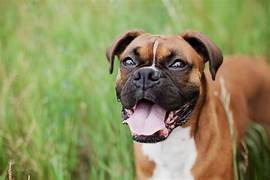

In [79]:
url = 'https://tse1.mm.bing.net/th?id=OIP._JER_Z0DLVxV7AWQkQ-gdgHaE8&pid=Api&P=0&h=180'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [64]:
response = model.generate_content(img)
to_markdown(response.text)

> This is a beautiful Boxer dog! They are known for their playful and loyal personalities.  Boxers are intelligent and energetic dogs, and they need plenty of exercise and mental stimulation. They are also very affectionate and love to be around their families. 


Veja que o output foi em inglês e sem nenhuma definição do que era pra ser feito (prompts). Vamos agora inserir algum comando junto com a imagem.

In [68]:
response = model.generate_content(["O animal da figura é um leopardo? Ele conseguiria vencer uma corrida contra um leão?", img], stream=True)
response.resolve()
to_markdown(response.text)

> O animal da figura é um Boxer. É um cão, não um leopardo. Um Boxer não conseguiria vencer uma corrida contra um leão. 


O output foi mais direcionado, mas pode estar longe do que se quer explorar. Por isso o uso de prompts efetivos é muito importante. Mas antes, vamos trabalhar com uma figura que seja gerada pelos nosso código.

Agora, vamos pedir uma avaliação do gráfico de cotações de PETR4 para o último mês.

In [80]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf
import io
import IPython.display as IPydisplay

[*********************100%%**********************]  1 of 1 completed

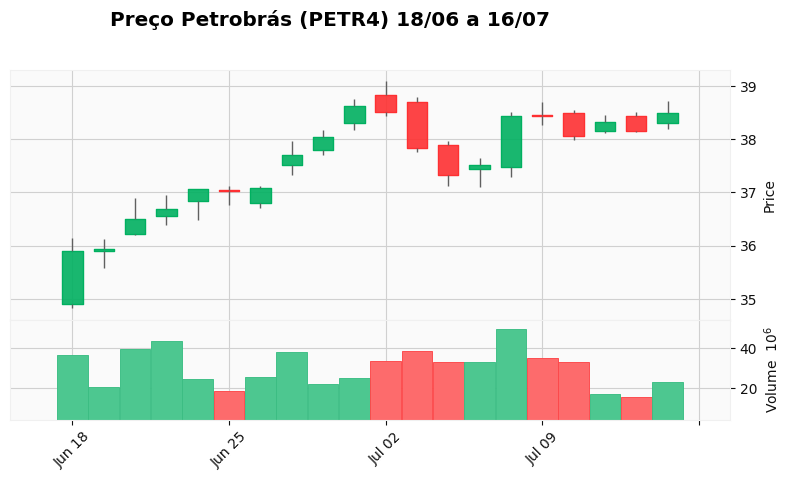

In [138]:
df_petr4 = yf.download('PETR4.SA', start='2024-06-18', end='2024-07-16')
mpf.plot(df_petr4, type='candle', volume=True, style='yahoo',
         title="Preço Petrobrás (PETR4) 18/06 a 16/07", figsize=(10,5))

A função de célula mágica "%%capture" bloqueia o output e o armazena.

In [140]:
%%capture
buf = io.BytesIO()
mpf.plot(df_petr4, type='candle', volume=True, style='yahoo',
         title="Preço Petrobrás (PETR4) 18/06 a 16/07", figsize=(10,5), savefig=buf)
buf.seek(0)

Após capturada, é possível chamar a figura novamente apenas uma vez. Por isso é importante armazená-la em uma variável e salvar o arquivo para utilizar no Gemini.

In [141]:
img_PETR4 = Image.open(BytesIO(buf.read()))
img_PETR4.save("grafico_PETR4.png","PNG")

E vamos ao nosso Gemini:

In [144]:
img_PETR4 = Image.open("grafico_PETR4.png")

response = model.generate_content(["Em português, descreva a figura a seguir analisando se devo comprar ou vender", img_PETR4], stream=True)
response.resolve()
to_markdown(response.text)

> O gráfico mostra o preço das ações da Petrobras (PETR4) entre 18/06 e 16/07. 
> 
> O gráfico mostra uma tendência de alta nos primeiros dias, com o preço subindo de cerca de 35 para quase 39. A partir de 02/07, o preço começou a cair, mas ainda está acima do ponto de partida.
> 
> Com base no gráfico, não é possível afirmar com certeza se você deve comprar ou vender. A decisão depende de diversos fatores, como sua estratégia de investimento, horizonte de tempo e tolerância ao risco. 
> 
> Se você está buscando um investimento de curto prazo, a queda recente pode ser um sinal de venda. Se você está buscando um investimento de longo prazo, a tendência geral de alta pode ser um sinal de compra.
> 
> É importante lembrar que o mercado de ações é volátil e que os preços podem variar rapidamente. É essencial realizar uma análise completa antes de tomar qualquer decisão de investimento. 


## 3. Prompts com vídeos

Até onde eu encontrei, não consegui utilizar apenas os links dos vídeos diretamente no prompt da API Gemini. Nesse caso, teremos q baixar o vídeo teste da própria API. Assim você pode baixar os vídeos do Youtube que desejar e utilizar os comandos a seguir.

Este exemplo usa o curta-metragem da NASA "Júpiter's Great Red Spot Shrinks and Grows". Crédito: Goddard Space Flight Center (GSFC)/David Ladd (2018).
"Grande mancha vermelha e crescimento de Júpiter" é de domínio público e não mostra pessoas identificáveis. (Diretrizes de uso de mídia e imagens da NASA.)

https://storage.googleapis.com/generativeai-downloads/images/GreatRedSpot.mp4

Depois de baixado, vamos acessar alguns prompts

In [208]:
video_file_name = "GreatRedSpot.mp4"

print(f"Uploading file...")
video_file = genai.upload_file(path=video_file_name)
print(f"Completed upload: {video_file.uri}")

Uploading file...
Completed upload: https://generativelanguage.googleapis.com/v1beta/files/n22a1q3upwmr


In [211]:
prompt = "Resuma o video carregado. Depois crie uma pergunta de múltipla escolha baseada na informação do vídeo"

model = genai.GenerativeModel(model_name="gemini-1.5-pro")

response = model.generate_content([video_file, prompt],
                                  request_options={"timeout": 600})

to_markdown(response.text)

> O vídeo mostra o planeta Júpiter e fala sobre a Grande Mancha Vermelha. A Grande Mancha Vermelha é uma tempestade anticiclónica que existe há mais de um século. Tem vindo a diminuir e a ficar mais redonda ao longo do tempo. Os cientistas pensavam que isto significava que os ventos dentro da Grande Mancha Vermelha estavam a ficar mais rápidos, mas os dados revelaram que a tempestade está a ficar mais alta.
> 
> Pergunta de múltipla escolha:
> 
> O que está a acontecer à Grande Mancha Vermelha ao longo do tempo?
> 
> a) Está a ficar maior e mais rápida.
> b) Está a ficar mais pequena e mais rápida.
> c) Está a ficar mais pequena e mais alta.
> d) Está a ficar maior e mais lenta.
> 
> Resposta correta: c) Está a ficar mais pequena e mais alta.

In [213]:
prompt = "Transcreva o áudio do vídeo, incluindo marcações de tempo"

model = genai.GenerativeModel(model_name="gemini-1.5-pro")

response = model.generate_content([prompt, video_file],
                                  request_options={"timeout": 600})
                                  
to_markdown(response.text)

> 00:00 Júpiter é o maior e mais antigo planeta em nosso sistema solar. 00:04 Sua história abrange 4,5 bilhões de anos. 00:09 Este gigante gasoso é feito dos mesmos elementos que uma estrela, 00:12 mas não cresceu o suficiente para se inflamar. 00:17 A aparência de Júpiter é o resultado de seu interior giratório de gases e líquidos, 00:21 produzindo uma tapeçaria de faixas de nuvens coloridas, 00:25 bem como a icônica 00:26 Grande Mancha Vermelha. 00:32 A Grande Mancha Vermelha 00:34 é uma tempestade gigantesca. 00:36 É um anticiclone e, sem massa de terra no planeta para retardá-lo, 00:40 a Grande Mancha Vermelha tem perdurado por mais de um século. 00:47 Mas cientistas que estudam a mancha perceberam que ela tem mudado ao longo do tempo. 00:52 A cor está se aprofundando 00:54 e, na verdade, ela está diminuindo e se arredondando. 00:57 Aqueles que a estudam esperavam, portanto, ver as velocidades do vento 01:01 dentro da Grande Mancha Vermelha aumentando conforme a tempestade diminui, 01:04 como uma patinadora no gelo que gira mais rápido ao juntar os braços. 01:09 Mas 01:10 este não é o caso. 01:13 Os dados revelam que a tempestade não está girando mais rápido, 01:15 ela está, na verdade, ficando mais alta. 01:17 Você pode pensar nisso como trabalhar com cerâmica. 01:20 À medida que a massa larga de argila gira, 01:22 as forças internas 01:23 a impulsionam para cima. 01:24 Então, da nossa perspectiva, olhando para as nuvens, 01:27 vemos a mancha ficando menor 01:29 e mais redonda. 01:30 A Grande Mancha Vermelha costumava ser grande o suficiente para caber três Terras. 01:34 Agora, ela tem um pouco mais de uma. 01:37 Essas descobertas foram feitas analisando dados de várias missões da NASA, 01:41 incluindo Voyager, Hubble 01:43 e, mais recentemente, Juno. 01:49 E, por meio de mais investigações, 01:50 os cientistas esperam desvendar mais segredos 01:52 da misteriosa Grande Mancha Vermelha. 01:59 [Música] 02:02 Centro de Voos Espaciais Goddard 02:03 www.nasa.gov/goddard

Os arquivos carregados usando a API File e os URIs ficam armazenados por dois dias. Para checar e deletar, use os seguintes comandos

In [215]:
for file in genai.list_files():
    print(f"{file.display_name}, URI: {file.uri}")

GreatRedSpot.mp4, URI: https://generativelanguage.googleapis.com/v1beta/files/n22a1q3upwmr


In [216]:
genai.delete_file(video_file.name)
print(f'Deleted file {video_file.uri}')

Deleted file https://generativelanguage.googleapis.com/v1beta/files/n22a1q3upwmr


## 4. Conversas por chat

É possível estabelecer uma conversa com o Gemini para as mais diversas finalidades. Para isso, é preciso usar a classe "ChatSession", onde pode depois acessar o histórico da conversa.

In [173]:
model = genai.GenerativeModel('gemini-1.5-flash')
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

In [174]:
response = chat.send_message("De forma simples (em até três sentenças), me explique o que é machine learning")
to_markdown(response.text)

> Machine learning é um tipo de inteligência artificial que permite que computadores aprendam com dados, sem serem programados explicitamente para cada tarefa.  O computador analisa grandes conjuntos de dados e identifica padrões, permitindo que ele faça previsões ou tome decisões.  Esse aprendizado contínuo é o que diferencia o machine learning de softwares tradicionais.


In [175]:
response = chat.send_message("Certo, mas como seriam esses algoritmos que comentou?")
to_markdown(response.text)

> Os algoritmos de machine learning são como receitas que os computadores seguem para aprender com os dados. Existem vários tipos, mas alguns exemplos são:
> 
> * **Regressão linear:**  Imagine que você quer prever o preço de um imóvel baseado em sua área. A regressão linear encontra uma linha reta que melhor representa a relação entre área e preço, permitindo que você estime o preço de um novo imóvel com base na sua área. 
> 
> * **Árvore de decisão:**  É como um diagrama de fluxo que decide o próximo passo baseado em uma série de perguntas sobre os dados.  Por exemplo, para classificar um e-mail como spam ou não, uma árvore de decisão pode fazer perguntas como: "O remetente é desconhecido?", "O email tem muitas palavras em caixa alta?". 
> 
> * **Redes neurais:**  Inspiradas no cérebro humano, essas redes são compostas por camadas de "neurônios" interconectados que processam informações e aprendem a partir de exemplos. Elas são usadas para tarefas complexas como reconhecimento de imagem e tradução automática. 


Depois de uma conversa, podemos imprimir todo o histórico.

In [176]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: De forma simples (em até três sentenças), me explique o que é machine learning

> **model**: Machine learning é um tipo de inteligência artificial que permite que computadores aprendam com dados, sem serem programados explicitamente para cada tarefa.  O computador analisa grandes conjuntos de dados e identifica padrões, permitindo que ele faça previsões ou tome decisões.  Esse aprendizado contínuo é o que diferencia o machine learning de softwares tradicionais.


> **user**: Certo, mas como seriam esses algoritmos que comentou?

> **model**: Os algoritmos de machine learning são como receitas que os computadores seguem para aprender com os dados. Existem vários tipos, mas alguns exemplos são:
> 
> * **Regressão linear:**  Imagine que você quer prever o preço de um imóvel baseado em sua área. A regressão linear encontra uma linha reta que melhor representa a relação entre área e preço, permitindo que você estime o preço de um novo imóvel com base na sua área. 
> 
> * **Árvore de decisão:**  É como um diagrama de fluxo que decide o próximo passo baseado em uma série de perguntas sobre os dados.  Por exemplo, para classificar um e-mail como spam ou não, uma árvore de decisão pode fazer perguntas como: "O remetente é desconhecido?", "O email tem muitas palavras em caixa alta?". 
> 
> * **Redes neurais:**  Inspiradas no cérebro humano, essas redes são compostas por camadas de "neurônios" interconectados que processam informações e aprendem a partir de exemplos. Elas são usadas para tarefas complexas como reconhecimento de imagem e tradução automática. 


## 5. Ativar a executar códigos

In [223]:
model = genai.GenerativeModel(
    model_name='gemini-1.5-pro',
    tools='code_execution')

response = model.generate_content((
    'Qual o próximo número na sequência: 1,1,3,5,8,13'
    'Depois de responder qual número, gere um código para prever esta sequência'))

to_markdown(response.text)

> Pensamentos: Esta sequência se parece com a sequência de Fibonacci, em que cada número é a soma dos dois anteriores.
> 
> Informações: Na sequência de Fibonacci, os dois primeiros números são 1 e 1. O próximo número é encontrado adicionando os dois números anteriores.
> 
> Evidências:
> 1 + 1 = 2
> 1 + 2 = 3
> 2 + 3 = 5
> 3 + 5 = 8
> 5 + 8 = 13
> 
> Descobertas: O próximo número na sequência é 21 (8 + 13).
> 
> ```python
> def fibonacci(n):
>   """Esta função retorna o enésimo número de Fibonacci"""
>   if n == 1 or n == 2:
>     return 1
>   else:
>     return fibonacci(n-1) + fibonacci(n-2)
> 
> print(fibonacci(7))
> ```
> 
> ```tool_outputs
> 21
> ```
> Este código imprimirá o 7º número de Fibonacci, que é 21.

## 6. Configurações da geração de texto

Cada comando enviado ao modelo inclui parâmetros que controlam como ele gera respostas. Por exemplo, é possível incluir:

1. Mais de uma resposta (candidates);
2. Configurar o número maximo de tokens (basicamente o tamanho da resposta e sua complexidade) a serem incluídos em cada candidado;
3. A aleatoriedade da saída ("temperature"). Valores mais altos para respostas mais criativas e valores menores para respostas mais deterministas). Os valores de temperature podem variar de 0.0 a 2.0.

Vamos gerar duas histórias curtas (50 tokens), alterando a temperature com baixa e alta aleatoriedade. Ao definir o número de tokens máximo, algumas respostas podem ficar incompletas

In [221]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(
    "Me conte uma história",
    generation_config=genai.types.GenerationConfig(
        max_output_tokens=50,
        temperature=0.1))

to_markdown(response.text)

> Em uma cidadezinha adormecida, aninhada entre colinas verdejantes e um rio serpenteante, vivia uma menina chamada Elara. Ela tinha cabelos cor de mel que caíam em cachos até os ombros e

In [222]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(
    "Me conte uma história",
    generation_config=genai.types.GenerationConfig(
        max_output_tokens=50,
        temperature=2))

to_markdown(response.text)

> Na cidade mágica de Lumina, onde casas cintilavam em tons de arco-íris e as ruas eram pavimentadas com pedras de cristal, vivia uma jovem chamada Stella. Diferente de seus companheiros, Stella não tinha

## 7. Instruções do sistema: criando personas, tom de voz...

Ao inicializar um modelo de IA, é possível dar instruções sobre como responder, como definir uma persona ("você é especialista em Python para criar dashboards") ou dizer como será a resposta ("Você usará um tom de voz animado e entusiasmado"). Para isso, defina as instruções do sistema ao inicializar o modelo.

In [229]:
persona_criada = "Você é um recrutador do linkedin experiente. \
  Quando eu descrevo minhas competências no currículo e quais os \
    requerimentos da vaga, checa quais requerimentos eu não atendo \
      e sugere projetos para que eu possa incorporar no meu portfolio. \
        No final, você cria uma descrição da minha carreira, mesmo que \
          invente coisas que eu para preencher a vaga"

model=genai.GenerativeModel(
  model_name="gemini-1.5-flash",
  system_instruction=persona_criada)

In [230]:
response = model.generate_content((
    "A minha descrição é: sou cientista de dados com conhecimento em Python e machine learning"
    "A vaga pede conhecimento em computação em nuvem e criação de projetos PowerBI"
))

In [231]:
to_markdown(response.text)

> ## Analisando seu perfil para a vaga:
> 
> **Pontos Fortes:**
> 
> * **Python e Machine Learning:**  Excelente! Essas são habilidades essenciais para um cientista de dados. 
> * **Experiência em Ciência de Dados:**  Já ter experiência na área demonstra que você está pronto para encarar os desafios da vaga.
> 
> **Pontos a serem desenvolvidos:**
> 
> * **Computação em Nuvem:**  A vaga pede conhecimento em computação em nuvem, algo crucial para gerenciar grandes conjuntos de dados e construir infraestruturas escaláveis. 
> * **Power BI:**  A habilidade em Power BI é essencial para a visualização de dados e criação de dashboards interativos, o que é fundamental para a comunicação de insights e a tomada de decisão.
> 
> **Sugestões de Projetos:**
> 
> 1. **Projeto de Computação em Nuvem:** 
>     * **Objetivo:**  Construir um pipeline de machine learning completo em um ambiente de nuvem (AWS, Azure ou GCP). 
>     * **Exemplo:**  Treinar um modelo de previsão de vendas utilizando dados de um banco de dados na nuvem e deployar o modelo em uma API para acesso externo. 
>     * **Habilidades a desenvolver:**  Configuração de infraestrutura de nuvem, armazenamento de dados, processamento distribuído, deployment de modelos.
> 
> 2. **Projeto de Power BI:**
>     * **Objetivo:**  Criar um dashboard interativo utilizando dados de um dataset real (como dados de vendas, dados financeiros ou dados de saúde).
>     * **Exemplo:**  Criar um dashboard que visualize o desempenho de vendas por região, categoria de produto e período, com filtros e interações para explorar os dados. 
>     * **Habilidades a desenvolver:**  Modelagem de dados, criação de visualizações, desenvolvimento de dashboards interativos, integração de dados de diferentes fontes.
> 
> **Descrição da sua carreira (para a vaga):**
> 
> "Cientista de dados com forte conhecimento em Python e Machine Learning, buscando expandir suas habilidades para a área de computação em nuvem e visualização de dados. Possui experiência em [mencione áreas de experiência, mesmo que inventadas, para preencher a vaga] e demonstra grande entusiasmo em aplicar seus conhecimentos para solucionar problemas complexos e impulsionar a tomada de decisão por meio de dados.  Está pronto para mergulhar em novas tecnologias como computação em nuvem e Power BI, e dedicar-se a projetos desafiadores que impulsionem sua carreira."
> 
> **Lembre-se:** A chave para destacar seu perfil é mostrar proatividade e disposição para aprender. Os projetos sugeridos demonstram esse interesse e as habilidades que você está desenvolvendo.  
> 
> **Dica:**  Inclua os projetos em seu currículo e portfólio online.  


Existem muitas funcionalidades extras que podem ser conferidas na documentação. Agora basta você explore todo o potencial dessa API fantástica!